# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [7]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')


model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Extract the weights and bias

In [8]:
model.layers[0].get_weights()

[array([[ 2.0541546],
        [-3.055421 ]], dtype=float32),
 array([5.038492], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0541546],
       [-3.055421 ]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([5.038492], dtype=float32)

## Extract the outputs (make predictions)

In [14]:
model.predict_on_batch(training_data['inputs']).round(1)[:10]

array([[ -7.3],
       [ 20.5],
       [-21.1],
       [-23.3],
       [ 14.4],
       [  0.4],
       [ 18.1],
       [ -9.5],
       [-33. ],
       [ -9.9]], dtype=float32)

In [12]:
training_data['targets'].round(1)[:10]

array([[ -7.3],
       [ 21.1],
       [-21. ],
       [-21.8],
       [ 14.5],
       [  1.2],
       [ 17.3],
       [ -9.1],
       [-32.2],
       [ -9.9]])

## Plotting the data

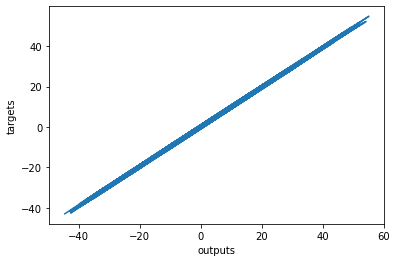

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()